<div >
<img src = "figs/ans_banner_1920x200.png" />
</div>

# Caso-taller:  PCA para estudiar la dimensionalidad de la calidad de vida en las ciudades 

En este caso-taller vamos a aplicar PCA en el estudio de calidad de vida en diferentes ciudades. Para ello, haremos uso de los datos que surgen del Almanaque Calificado de Lugares. En este Almanaque Boyer y Savageau calificaron 329 ciudades de acuerdo con los siguientes nueve criterios:

   - Clima y Terreno
   - Alojamiento
   - Cuidado de la salud y el medio ambiente
   - Crimen
   - Transporte
   - Educación
   - Artes
   - Recreación
   - Economía 


Con tantas variables disponibles, la matriz de dispersión puede resultar muy grande para estudiarla e interpretarla adecuadamente. Habría demasiadas correlaciones por pares entre las variables para considerar. Para interpretar los datos de una forma más significativa es necesario reducir el número de variables a unas pocas dimensiones, y para ello en este ejercicio recurriremos al análisis de componentes principales. 
 

## Instrucciones generales

1. Para desarrollar el *cuaderno* primero debe descargarlo junto al archivo de soporte.

2. Para responder cada inciso deberá utilizar el espacio debidamente especificado.

3. La actividad será calificada sólo si sube el *cuaderno* de jupyter notebook con extensión `.ipynb` en la actividad designada como "entrega calificada por el personal".

4. El archivo entregado debe poder ser ejecutado localmente por el tutor. Sea cuidadoso con la especificación de la ubicación de los archivos de soporte, guarde la carpeta de datos en la misma ruta de acceso del cuaderno, por ejemplo: `data/archivo_de_soporte.csv`.

## Desarrollo


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler
import random
from pca import pca

### 1. Carga de datos

En la carpeta `data` se encuentra el archivo `lugares.csv` cargue estos datos en su *cuaderno*.

In [3]:
# Utilice este espacio para escribir el código.
#X = pd.read_csv('data/lugares.csv')
X = pd.read_csv('https://raw.githubusercontent.com/dayroncj/Unsupervised/main/lugares.csv')

# Convertimos la variable ciudad en el índice del dataframe
X=X.set_index('Ciudad')

X.sample(frac=1, random_state=random.seed())
#X.head(10)

,Clima y Terreno,Alojamiento,Cuidado de la salud y el medio ambiente,Crimen,Transporte,Educación,Artes,Recreación,Economía
Ciudad,,,,,,,,,
"Davenport-Rock-Island-Moline,IA-IL",440,8083,1113,834,3907,2901,1017,1920,4997
"Savannah,GA",542,6896,1084,1614,5958,2456,2262,2237,5591
"Tuscaloosa,AL",470,6464,674,1014,4723,2390,1432,1090,4900
"Honolulu,HI",717,17021,1298,891,5911,2502,7168,3703,5187
"Aurora-Elgin,IL",474,10384,1203,821,3943,2208,3857,1800,5097
...,...,...,...,...,...,...,...,...,...
"Salinas-Seaside-Monterey,CA",843,13838,352,1107,4160,2439,1004,3179,5656
"Roanoke,VA",652,7476,1036,784,3872,2723,1263,2036,5287
"Anniston,AL",560,5530,598,1125,3051,2189,268,1165,4730


(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

Por medio de la **librería pandas** leímos el archivo lugares.csv que fue suministrado inicialmente.

Este archivo fue ubicado en la plataforma de **Github**.

Visualizamos una muestra de **10 ciudades** de las **329 incluidas** en el archivo, elegida de forma aleatoria.

### 2.  Análisis descriptivo de las variables. 

Para el análisis descriptivo haga uso de estadísticas descriptivas y matrices de correlación. Indique además cuantas gráficas de dispersión bivariadas debería examinar con este número de variables. 

Explique porqué es importante conocer las estadísticas descriptivas y como contribuyen al ejercicio posterior de Análisis de Componentes Principales.
 
Tenga en cuenta que para las variables, a excepción de la alojamiento y crimen, cuanto mayor sea el puntaje, mejor. Por el contrario; para alojamiento y crimen, mientras más bajo sea el puntaje, mejor. También, mientras algunas comunidades podrían calificar mejor en las artes, otras podrían calificar mejor en otras áreas como tener una tasa de criminalidad más baja y buenas oportunidades educativas.

In [4]:
# Utilice este espacio para escribir el código.
X.info()
X.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 329 entries, Abilene,TX to Yuba-City,CA
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   Clima y Terreno                          329 non-null    int64
 1   Alojamiento                              329 non-null    int64
 2   Cuidado de la salud y el medio ambiente  329 non-null    int64
 3   Crimen                                   329 non-null    int64
 4   Transporte                               329 non-null    int64
 5   Educación                                329 non-null    int64
 6   Artes                                    329 non-null    int64
 7   Recreación                               329 non-null    int64
 8   Economía                                 329 non-null    int64
dtypes: int64(9)
memory usage: 25.7+ KB


,Clima y Terreno,Alojamiento,Cuidado de la salud y el medio ambiente,Crimen,Transporte,Educación,Artes,Recreación,Economía
count,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000
mean,538.732523,8346.559271,1185.738602,961.054711,4210.082067,2814.887538,3150.884498,1845.957447,5525.364742
std,120.808259,2385.262622,1003.002036,357.154186,1451.179240,320.792953,4642.283738,807.888171,1084.468523
min,105.000000,5159.000000,43.000000,308.000000,1145.000000,1701.000000,52.000000,300.000000,3045.000000
25%,480.000000,6760.000000,583.000000,707.000000,3141.000000,2619.000000,778.000000,1316.000000,4842.000000
50%,542.000000,7877.000000,833.000000,947.000000,4080.000000,2794.000000,1871.000000,1670.000000,5384.000000
75%,592.000000,9015.000000,1445.000000,1156.000000,5205.000000,3012.000000,3844.000000,2176.000000,6113.000000
max,910.000000,23640.000000,7850.000000,2498.000000,8625.000000,3781.000000,56745.000000,4800.000000,9980.000000


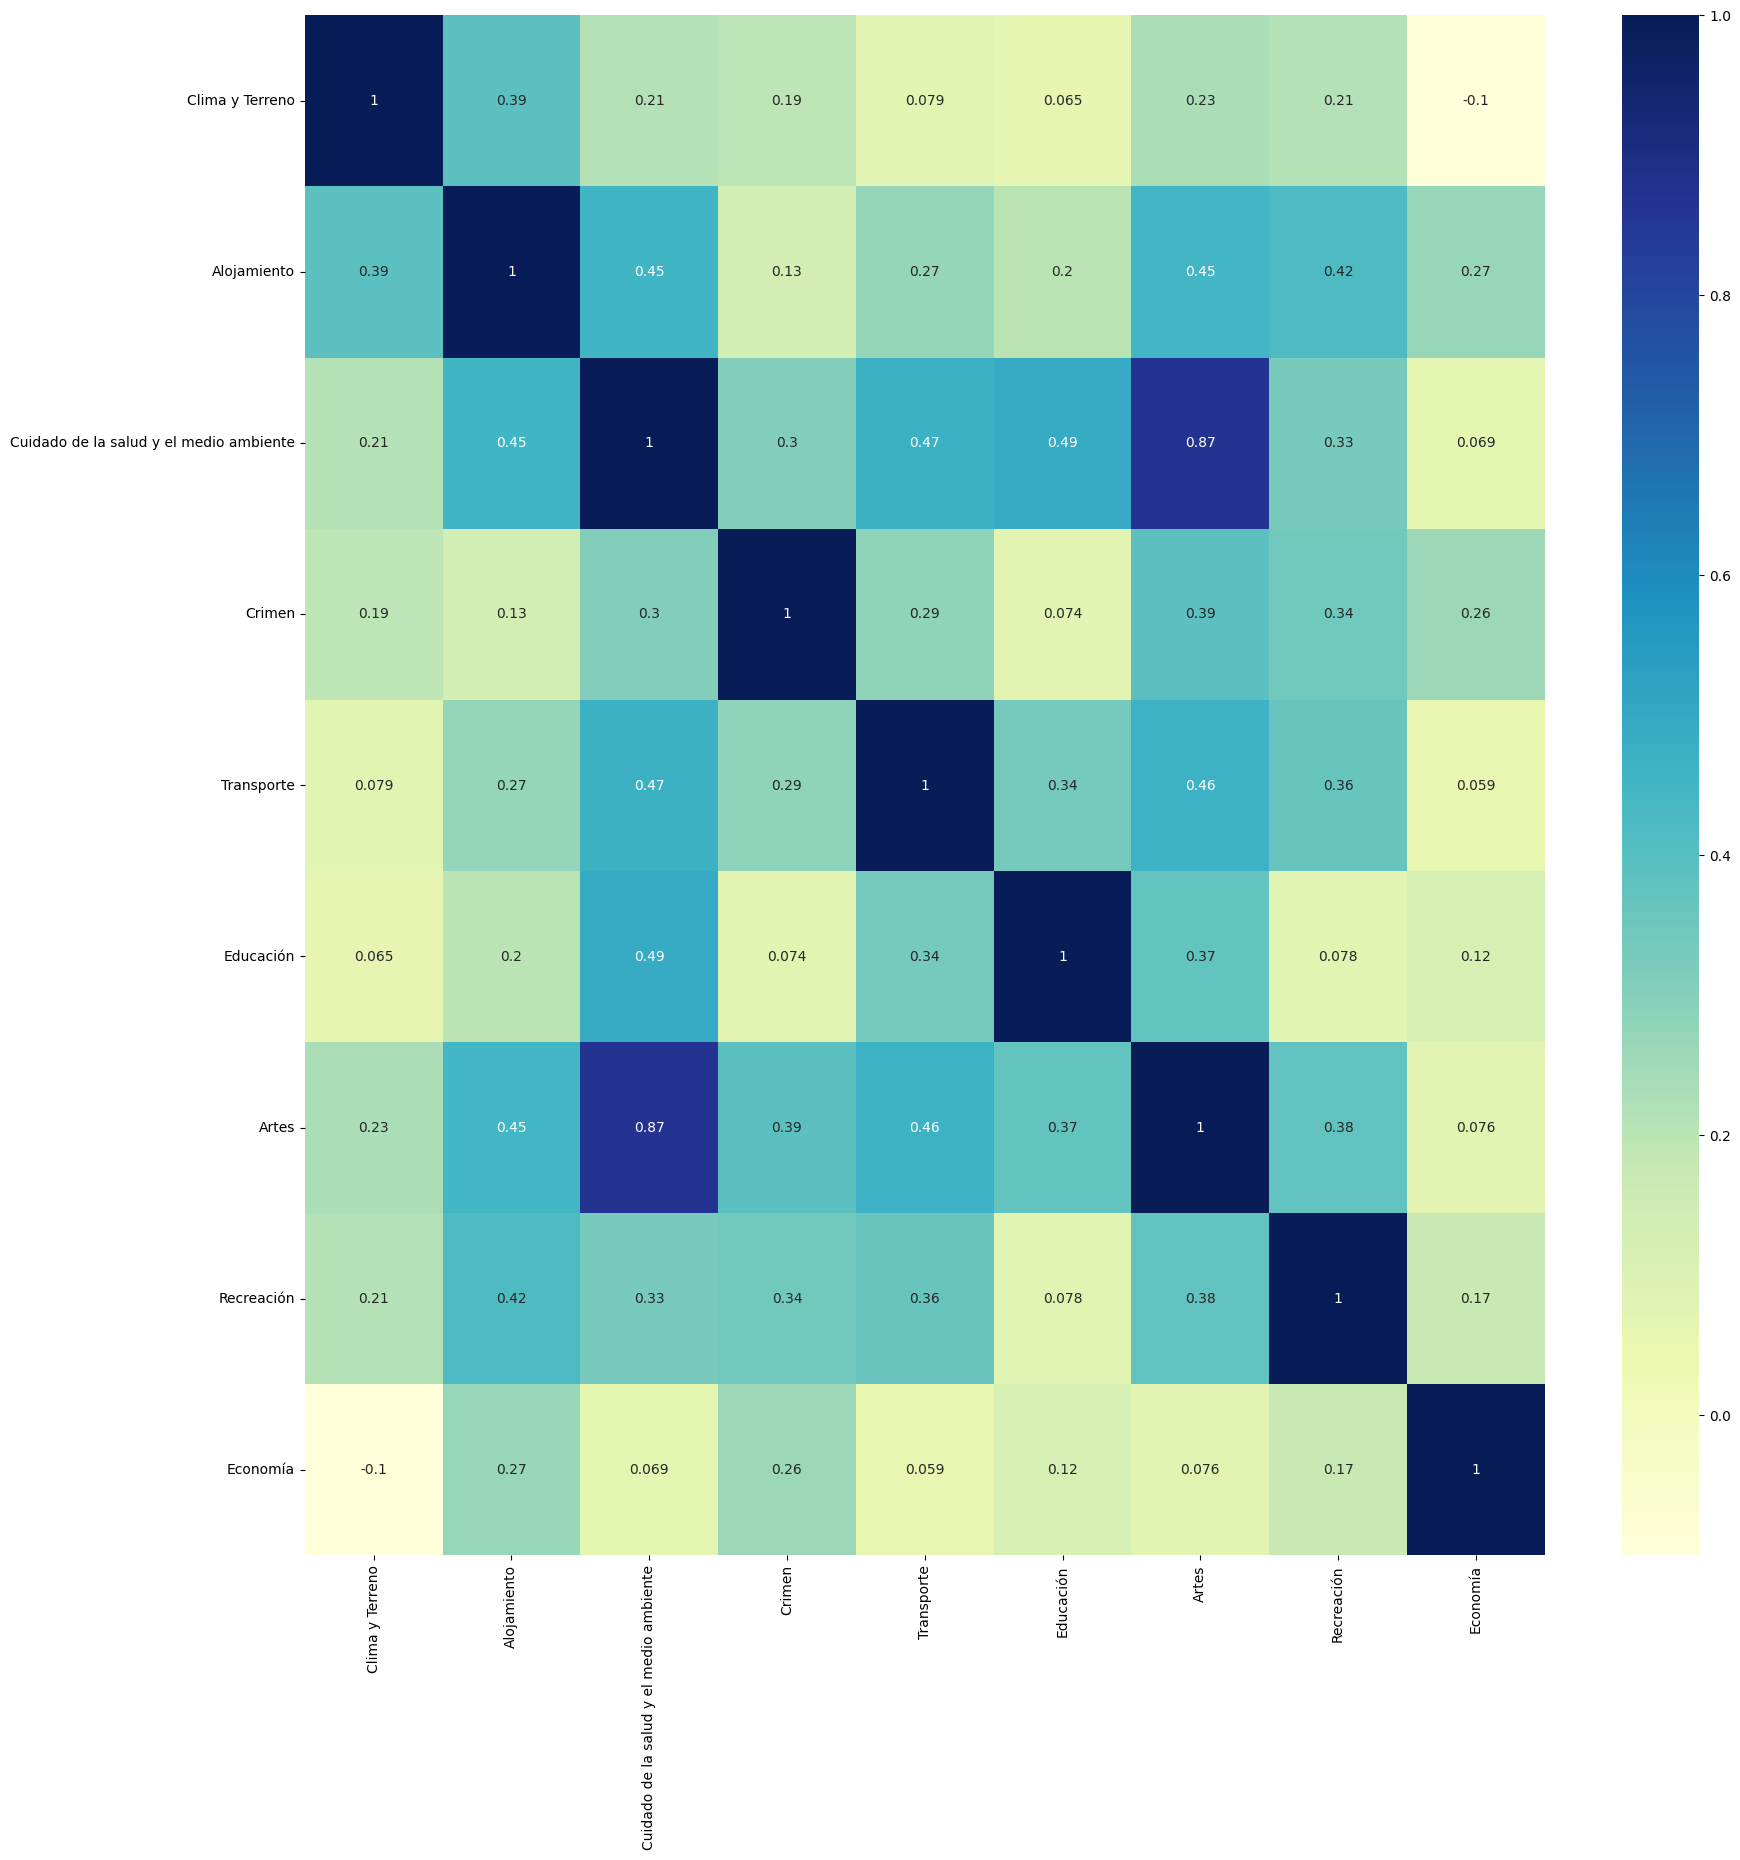

In [5]:
plt.figure(figsize=(20,20))
dataplot = sb.heatmap(X.corr(), cmap="YlGnBu", annot=True)
plt.show()



(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

1. Iniciamos el análisis revisando si existen valores nulos en alguna de las columnas (asociadas a las variables) del conjunto de datos. A través del método *info()*, podemos evidenciar que **no existen valores nulos** en ninguna de las columnas (variables).

2. Luego, obtuvimos **estadísticas descriptivas** tales como la media, la desviación estándar y los percentiles usando el método *describe()* de la librería Pandas, para tener una aproximación a la distribución de los datos, encontrando que:

- **Alojamiento** y **Economía** son los atributos cuya calificación presenta las medias más altas, lo que sugiere que la mayoría de ciudades tienen puntuaciones altas en estos aspectos comparado con otras variables, si bien las puntuaciones altas en **Alojamiento** reflejan un peor desempeño.
- Lo anterior lo podemos contrastar con los valores máximos para cada atributo, encontrando que **Alojamiento** y **Economía** presentan los mayores valores, y en el otro extremo, se encuentran **Recreación** y **Cuidado de la salud y el medio ambiente** siendo los atributos que presentan los puntajes más bajos.
- Observando los valores de los percentiles 25, 50 y 75 notamos que las diferencias entre sus valores para **Artes**, **Recreación** y **Economía** indican que estos atributos presentan para el 75% de los datos puntuaciones por encima de la media. Esto podría evidenciarse mejor con algunos histogramas.

3. Posteriormente, realizamos un análisis de correlación usando la función *corr()* y graficando estos valores en un **gráfico de correlación** para facilitar su interpretación de cuáles de estos atributos podrían estar más relacionados entre sí, observando que:

- El **Cuidado de la salud y el medio ambiente** está altamente correlacionado con el atributo **Artes**, por lo cual esperamos que al realizar el **análisis de componentes principales** estas variables sean parte de uno de los componentes principales.
- Las demás variables no presentan altas correlacionnes entre ellas.

4. Ahora, si quisiéramos analizar de manera gráfica a través de gráficas de dispersión bivariadas, tendríamos que el número total de pares de variables a analizar sería 36 que corresponde a la **combinación de 9 en 2** (9!/(2!*(9-2)!)), solo para este conjunto de datos con 9 variables.

5. El análisis descriptivo realizado anteriormente es útil porque permite evidenciar de forma inicial las posibles relaciones entre las variables consideradas de manera tal que se puede inferir las posibles combinaciones de variables que serán consideradas en el análisis de componentes principales.

### 3.  Cálculo y selección de componentes principales.

Utilizando Álgebra Lineal, calcule los eigen valores y los eigen vectores, a partir de ellos obtenga los Componentes Principales. Tenga en cuenta de estandarizar las variables y explicar por qué es importante no omitir este paso. 

Luego, examine los valores propios para determinar cuántos componentes principales se deben considerar. Explique el criterio que utilizó para la elección y justifique su respuesta.

In [6]:
# Utilice este espacio para escribir el código.
# Estandarizamos los datos
mu = X.mean()
sigma = X.std()
Z = (X - mu)/sigma
Z.head()

,Clima y Terreno,Alojamiento,Cuidado de la salud y el medio ambiente,Crimen,Transporte,Educación,Artes,Recreación,Economía
Ciudad,,,,,,,,,
"Abilene,TX",-0.146782,-0.899926,-0.945899,-0.106550,-0.123405,-0.180451,-0.464186,-0.545815,1.943473
"Akron,OH",0.300207,-0.087437,0.468854,-0.210147,0.463704,-1.174862,0.519812,0.972960,-1.083816
"Albany,GA",-0.585494,-0.422410,-0.566039,0.025046,-1.157047,-0.794555,-0.627683,-1.221651,-0.253917
"Albany-Schenectady-Troy,NY",-0.519273,-0.183862,0.244527,-0.982922,1.841894,1.820839,0.324003,-0.283402,0.312259
"Albuquerque,NM",0.995524,0.019470,0.665264,1.461400,1.617938,0.658096,0.289753,0.948204,0.185930


(Utilice este espacio para describir el procedimiento, análisis, y conclusiones).

El primer paso para el **análisis de componentes principales** consiste en escalar los valores del conjunto de resultados. Para esta tarea nos obtuvimos la media y el valor estándar de los valores del conjunto de datos.  Posteriormente, se restó la media (mu) de cada valor en X y luego dividimos por la desviación estándar (sigma). Con esto logramos que los valores del dataset estén centrados en cero y varíen 1 unidad de desviación estándar por encima de la media.

Como se pudo observar en el análisis exploratorio de los datos, la escala de puntuaciones de cada tributo presentan valores muy diversos, por tanto, aplicando este escalamiento logramos ajustar los valores de las variables para que tengan una distribución similar y puedan ser comparables dentro de un mismo rango numérico.  Esto es importante realizarlo antes de identificar los componentes principales porque:

- Nivelamos la "contribución" de todas las variables.  Si las variables tienen diferentes rangos o magnitudes, las variables con valores más altos dominarán la variabilidad y las variables con valores más bajos tendrán menos influencia.
- Los algoritmos de PCA son sensibles a la escala de los datos. Podríamos terminar identificando atributos principales, sesgados por sus valores altos y no realmente por su importancia en la explicación de un comportamiento.
- Desde el punto de vista computacional, nivelar los rangos de valores también permite que estos algoritmos de PCA puedan ejecutarse de una manera óptima.

In [7]:
# Utilice este espacio para escribir el código.

# Calculamos la matriz de varianzas de la matriz de los datos estandarizados
S=Z.cov()
print('El tamaño de la matriz de covarianzas es ' + str(S.shape))
S
print('---------------------------------------------------------------------------')

# Ahora, procedemos a calcular los eigenvalores y los eigenvectores de la matriz de varianzas
eig_val, eig_vec = np.linalg.eig(S)
print(eig_val)
print('---------------------------------------------------------------------------')
print('El mayor valor de los eigenvalores es ' + str(max(eig_val)))
print('---------------------------------------------------------------------------')

eig_vec_t=eig_vec.T
eig_vec_t
print('El eigenvector asociado a dicho eigenvalor es:')
print(eig_vec_t[[0]])
print('---------------------------------------------------------------------------')

# Para elegir la cantidad de componentes principales que elegiremos, utilizaremos el Criterio de Kaiser y elegiremos los eigenvalores mayores que 1
condicion = eig_val>1
print(condicion)
print('---------------------------------------------------------------------------')

# Calculamos la proporción de varianza contenida por cada eigenvector
prop_var_cont = eig_val/sum(eig_val)
print(prop_var_cont)
print('---------------------------------------------------------------------------')

# Calculamos la varianza explicada por los 3 eigenvalores seleccionados
var_exp=prop_var_cont[0]+prop_var_cont[1]+prop_var_cont[2]
print('Los 3 componentes principales considerados a partir de los 3 eigenvalores elegidos explican el '+ str(round(var_exp*100,3)) + ' % de la varianza. Sin embargo, no superan el umbral del 70 %')
print('---------------------------------------------------------------------------')
var_exp_2=prop_var_cont[0]+prop_var_cont[1]+prop_var_cont[2]+prop_var_cont[3]
print('Si agregamos el siguiente componente principale podemos notar que los 4 eigenvalores elegidos explican el '+ str(round(var_exp_2*100,3)) + ' % de la varianza.')
print('---------------------------------------------------------------------------')


El tamaño de la matriz de covarianzas es (9, 9)
---------------------------------------------------------------------------
[3.4082918  1.21397617 1.14147915 0.92091782 0.75328488 0.6305619
 0.49304772 0.31803849 0.12040208]
---------------------------------------------------------------------------
El mayor valor de los eigenvalores es 3.4082918006352405
---------------------------------------------------------------------------
El eigenvector asociado a dicho eigenvalor es:
[[0.20641395 0.35652161 0.46021465 0.28129838 0.35115078 0.27529264
  0.46305449 0.32788791 0.13541225]]
---------------------------------------------------------------------------
[ True  True  True False False False False False False]
---------------------------------------------------------------------------
[0.37869909 0.13488624 0.12683102 0.1023242  0.08369832 0.07006243
 0.05478308 0.03533761 0.01337801]
---------------------------------------------------------------------------
Los 3 componentes principale

(Utilice este espacio para describir el procedimiento, análisis, y conclusiones).

1. Para calcular los componentes principales primero calculamos la matriz de varianzas S de la matriz de los datos estandarizados X y posteriormente calculamos sus eigenvalores y sus respectivos eigenvectores.

2. Al calcular los eigenvalores de la matriz de varianzas S encontramos que el mayor valor es **3.4082918** que corresponde con el primer eigenvector. De esta manera, el primer componente principal **CP1** es:

\begin{align}
f_1 =  0.20 \times CyT + 0.35 \times Al + 0.46 \times CSyM + 0.28 \times Cr + 0.35 \times Tr + 0.28 \times Ed + 0.46 \times Art + 0.33 \times Rec + 0.14 \times Ec
\end{align}

donde CyT es Clima y Terreno, Al es Alojamiento, CSyM es Cuidado de la salud y el medioambiente, Cr es Crimen, Tr es Transporte, Ed es Educación, Art es Artes, Rec es Recreación y Ec es Economía.

3. Para elegir los componentes principales que serán considerados para reducir la dimensionalidad utilizamos el Criterio de Kaiser en el que excluímos los eigenvalores menores o iguales a 1. En este caso, solo nos quedamos con 3 eigenvalores, en este caso, los 3 primeros, que explican el 64 % de la varianza, menos del umbral del 70 %.

4. Para superar el umbral del 70 % de la varianza explicada, consideramos la inclusión de un cuarto componente principal asociado al cuarto eigenvalor obtenido. De esta manera, los 4 componentes principales lograrán explicar el 74.28 % de la varianza.

5. Para los 4 componentes principales podemos generar una expresión como la del paso 2:

\begin{align}
f_2 =  0.22 \times CyT + 0.25 \times Al + 0.30 \times CSyM + 0.36 \times Cr - 0.18 \times Tr - 0.48 \times Ed - 0.19 \times Art + 0.38 \times Rec + 0.47 \times Ec
\end{align}

\begin{align}
f_3 =  0.69 \times CyT + 0.21 \times Al + 0.01 \times CSyM - 0.19 \times Cr - 0.15 \times Tr - 0.23 \times Ed + 0.13 \times Art + 0.05 \times Rec - 0.61 \times Ec
\end{align}

\begin{align}
f_4 =  0.14 \times CyT + 0.51 \times Al + 0.01 \times CSyM - 0.54 \times Cr - 0.30 \times Tr + 0.34 \times Ed - 0.10 \times Art - 0.19 \times Rec + 0.42 \times Ec
\end{align}

6. Finalmente, se implementó código usando la libreria *pca* para obtener 4 componentes principales y se obtuvo los mismos resultados encontrados por medio de herramientas del Álgebra Lineal.

### 4.  Interpretación de los componentes principales. 

Logró reducir la dimensión en el ejercicio anterior? Si lo hizo, los pesos obtenidos pueden identificar dimensiones menores de los datos? Dé una interpretación a estas dimensiones, para ello puede utilizar gráficas, tablas, etc.

In [18]:
# Utilice este espacio para escribir el código.

print(eig_vec_t[0])
print('---------------------------------------------------------------------------')
print(eig_vec_t[1])
print('---------------------------------------------------------------------------')
print(eig_vec_t[2])
print('---------------------------------------------------------------------------')
print(eig_vec_t[3])

[0.20641395 0.35652161 0.46021465 0.28129838 0.35115078 0.27529264
 0.46305449 0.32788791 0.13541225]
---------------------------------------------------------------------------
[ 0.21783531  0.250624   -0.29946528  0.35534227 -0.17960448 -0.48338209
 -0.19478992  0.38447464  0.47128328]
---------------------------------------------------------------------------
[ 0.68995598  0.20817223  0.00732493 -0.18510498 -0.14637628 -0.22970255
  0.0264843   0.05085264 -0.60731447]
---------------------------------------------------------------------------
[ 0.13732125  0.51182871  0.01470183 -0.53905047 -0.30290371  0.33541103
 -0.10108039 -0.18980082  0.42176994]


(Utilice este espacio para describir el procedimiento, análisis, y conclusiones).

1. Para el primer componente principal los mayores pesos se encuentran asociados a las variables **Cuidado de la salud y el medio ambiente** y **Artes**, por lo que podríamos asociarlo con la **Cultura** de la ciudad.

2. Para el segundo componente principal los mayores pesos se encuentran asociados a **Recreación** y **Economía**, por lo que podríamos asociarlo con los **Tiempo libre** de la ciudad.

3. Para el tercer componente principal el mayore peso se encuentran asociado a **Clima y Terreno**, por lo que podríamos asociarlo con la **Ubicación** de la ciudad.

4. Para el cuarto componente principal los mayores pesos se encuentran asociados a **Alojamiento** y **Crimen**, por lo que podríamos asociarlo con la **Superpoblación** de la ciudad.



### 5.   Detección de ciudades inusuales.

A partir de los Componentes Principales identifique las 5 ciudades calidad de vida inusualmente alta. En la distribución de calidad de vida  de la muestra que tan inusuales son? Cuáles son las dimensiones que hacen que estas ciudades tengan esta calidad de vida inusual?

In [40]:
# Utilice este espacio para escribir el código.

# Inicializamos el objeto PCA
model = pca(n_components=4)

# Ajustamos el PCA a nuestros datos 
calidad_vida_pca = model.fit_transform(Z, verbose=False)
calidad_vida_pca


X_cp=calidad_vida_pca['PC']
print(X_cp['PC1'].sort_values())
print('--------------------------------------')
print(X_cp['PC2'].sort_values())
print('--------------------------------------')
print(X_cp['PC3'].sort_values())
print('--------------------------------------')
print(X_cp['PC4'].sort_values())
print('--------------------------------------')

Gadsden,AL                     -2.915407
Dothgan,AL                     -2.788850
Pascagoula,MS                  -2.734257
Florence,AL                    -2.647107
McAllen-Edinburg-Mission,TX    -2.571686
                                 ...    
Boston,MA                       6.301057
Chicago,IL                      6.464912
Los-Angeles,Long-Beach,CA       7.246307
San-Francisco,CA                7.391403
New-York,NY                    12.426251
Name: PC1, Length: 329, dtype: float64
--------------------------------------
Chicago,IL                    -3.087134
Philadelphia,PA-NJ            -3.073287
Pittsburgh,PA                 -2.455907
Washington,DC-MD-VA           -2.264874
New-York,NY                   -2.061746
                                 ...   
Lafayette,LA                   2.541852
Salinas-Seaside-Monterey,CA    2.873618
Midland,TX                     3.029992
Atlantic-City,NJ               3.048975
Las-Vegas,NV                   3.339066
Name: PC2, Length: 329, dtype: 

In [58]:
def plot_cities(name):
    pc_values = X_cp[name].sort_values(ascending=False)[:4]
    pc_values.plot(kind='bar', figsize=(10, 6))

    plt.xlabel('Ciudad')
    plt.ylabel(f'Valor de {name}')
    plt.title(f'Top 4 Ciudades por Valor de {name}')

    plt.xticks(rotation=45)

    plt.show()

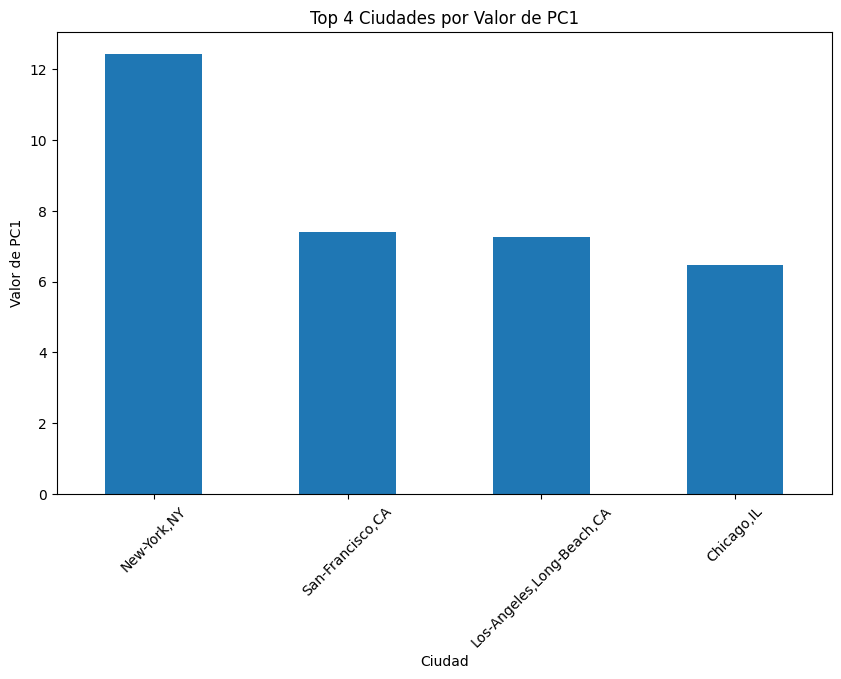

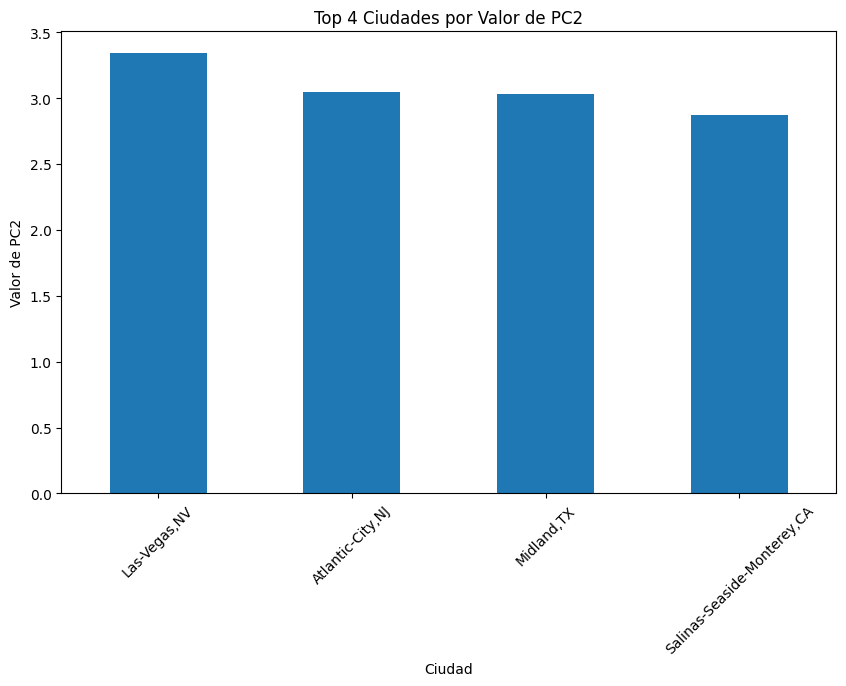

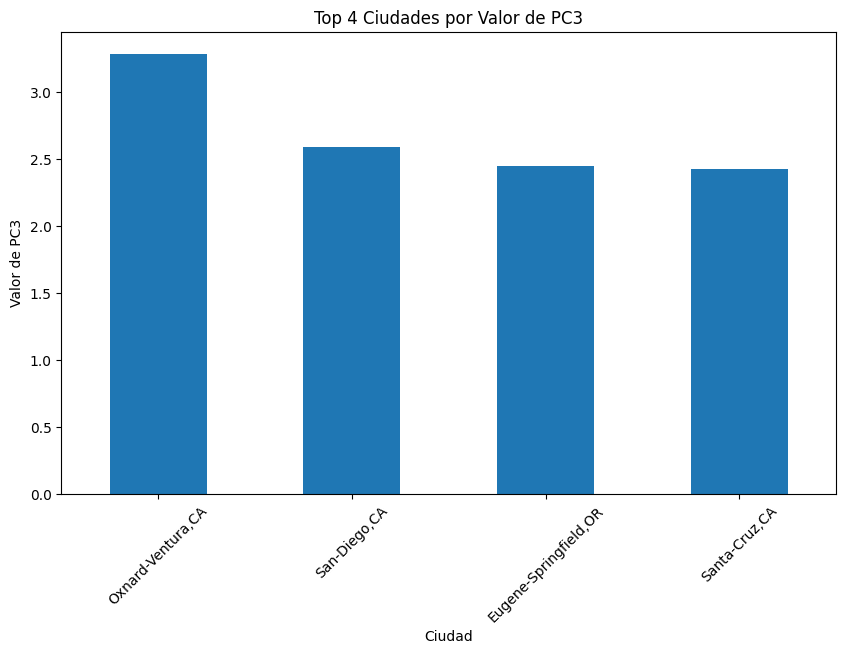

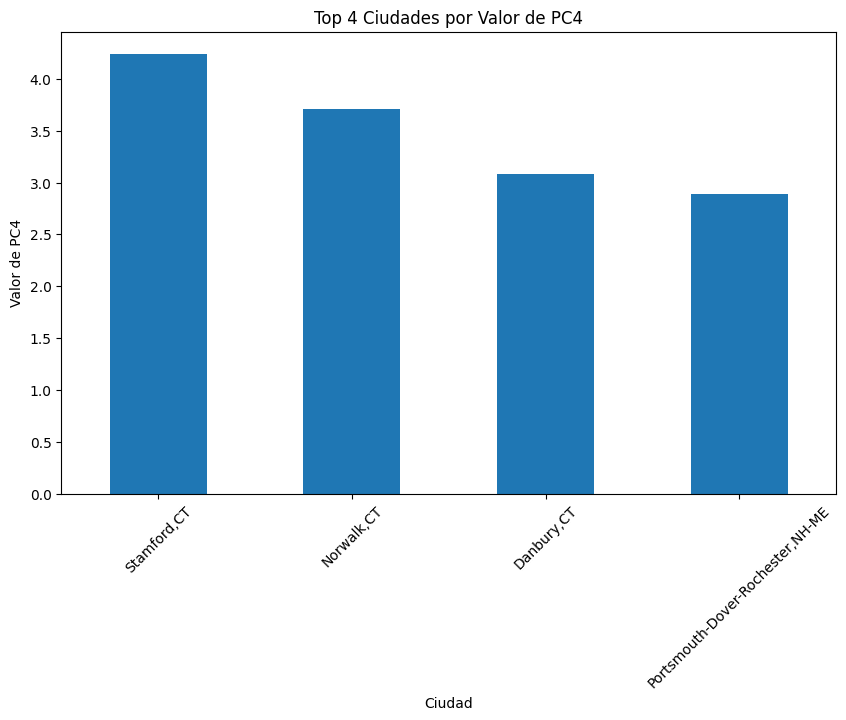

In [59]:
plot_cities('PC1')
plot_cities('PC2')
plot_cities('PC3')
plot_cities('PC4')

(Utilice este espacio para describir el procedimiento, análisis, y conclusiones).

1. Si consideramos el componente principal 1 PC1, que asociamos con la Cultura, encontramos que las ciudades con mayor calidad de vida son: New-york, San Francisco, Los Angeles, Chicago y Boston.

2. Si consideramos el componente principal 2 PC2, que asociamos con el Tiempo libre, encontramos que las ciudades con mayor calidad de vida son: Las Vegas, Atlantic City, Midland, Salinas Monterrey y Lafayette.

3. Si consideramos el componente principal 3 PC3, que asociamos con la Ubicación, encontramos que las ciudades con mayor calidad de vida son: Oxnard Ventura, San Diego, Eugene Springfield, Santa Cruz y Salinas Monterrey.

4. Si consideramos el componente principal 4 PC4, que asociamos con la Superpoblación (considerando los puntajes bajos como los mejores), encontramos que las ciudades con mayor calidad de vida son: New-Tork, Miami, Flint, Las Vegas y Muskegon.

En conclusión, parece concluirse que las ciudad con mejor calidad de vida son **New York**, **Las Vegas** y **Salinas Monterrey**.
